# Categorical Variables and Interactions

__Linear Regression Learning Objectives__ 
* Categorical Variables
* Interactions

__Salmon Learning Objectives__ 
* Categorical Variables
* Interactions

In [96]:
import pandas as pd
from salmon import *
%matplotlib inline
plt.style.use('seaborn')
ames = pd.read_csv("data/chapter6/AmesHousing.txt")

## Categorical Variables
When you are collecting data, it is extremely common to find non-numerical data. If we think about our Ames housing data set, there are many non-numerical variables. For example, we can't quantify the type of foundation, it is label as poured concrete ("PConc"), concrete blocks ("CBlock") or other ("Other"). We can call these variables __categorical variables__ and their categories are the __levels__. 

In [64]:
ames["Lot Shape"].unique()

array(['IReg', 'Reg'], dtype=object)

Since our end goal is to explore this data set using Linear Regression, we can't use this categorical data in it's current form. To transform it into numerical data, we can use a method called one hot encoding or dummying a variable. One hot encoding works in the following way: 
- For each level, create a categorical.
- If the observation is of that level, assign a one.
- Else, assign a zero.

We can easily dummy variables in pandas using the method `get_dummies` and passing in the column we want to dummy.

In [72]:
pd.get_dummies(ames["Lot Shape"]).iloc[[0,16,4]]

,IReg,Reg
0,1,0
16,1,0
4,1,0


In SALMON, categorical variables are automatically created when using the `Categorical` variable wrapper. If we have a quantitative variable, we can use the `Quantitative` wrapper. Both of these can be abbreviated as `Q()` and `C()`. Let's run through an example of fitting a model with a categorical and quantitative variable with the Ames housing data set.

In [77]:
lot_shape = C("Lot Shape")
living_area = Q("Gr Liv Area")
explanatory = living_area + lot_shape
response = Log(Q("SalePrice"))
model = LinearModel(explanatory, response)
model.fit(ames)

,Coefficients,SE,t,p
Gr Liv Area,0.000529,0.000011,50.139598,0.000000e+00
Lot Shape{Reg},-0.161933,0.011081,-14.613975,9.739021e-47
Intercept,11.329817,0.019317,586.526354,0.000000e+00


### Interpreting Categorical variables
Our model from the fitted data set above looks as follows:

$$log(y) = 11.3298 + 0.000529X_1 + -0.161933X_2$$

In this case, X_2 (Lot Shape) can either be 0 or 1. With the regular lot shape our model is:
$$log(y) = 11.3298 + 0.000529X_1 + -0.161933*0$$

and with an irregular lot shape the model is:

$$log(y) = 11.3298 + 0.000529X_1 + + -0.161933*1$$

The coefficient represents the difference in the mean value of the response. We can interpret this model as:

Holding the living area constant, the difference in the log of a home's price is -0.161933 when the lot shape is regular versus a housing with an irregular lot shape.

This can be seen when we plot then model in SALMON.

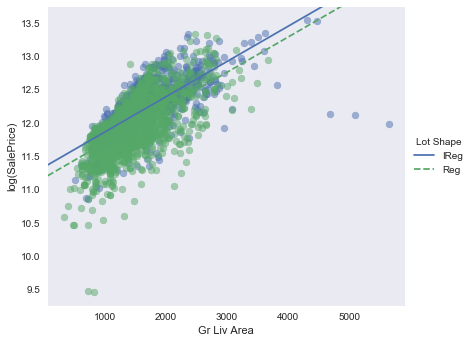

In [76]:
 model.plot(original_y_space=False)

SALMON plots two lines, one with a regular lot shape and one with a iregular lot shape. The lines are parrellel to each other and the only difference is the intercept. This is the lot coefficient coming into effect.

## Interactions

Interactions are a useful tool when trying to find the best model. If you suspect that there is a relationship between variables, try using an interaction. To create an interaction, we multiple explanatory variables. Let's go over an example of interactions using SALMON. We can investigate whether a there is a significant relationship between having a regular lot shape and the living area of your home. To create an interaction in SALMON, multiple your variables together then add them to your explanatory equation.

In [94]:
lot_shape = C("Lot Shape")
living_area = Q("Gr Liv Area")


explanatory = living_area + lot_shape + lot_shape*living_area
response = Log(Q("SalePrice"))
model = LinearModel(explanatory, response)
model.fit(ames)
#model.plot(original_y_space=False)


,Coefficients,SE,t,p
Gr Liv Area,0.000472,0.000016,30.004674,1.094871e-172
Lot Shape{Reg},-0.321094,0.034401,-9.333766,1.958125e-20
(Gr Liv Area)(Lot Shape{Reg}),0.000103,0.000021,4.884848,1.090752e-06
Intercept,11.423400,0.027153,420.708532,0.000000e+00


Interestingly, there is a significant relationship between living area and lot shape. Let's take a moment and think about why. To help us, let's look at the regression line plotted. in the original y space.

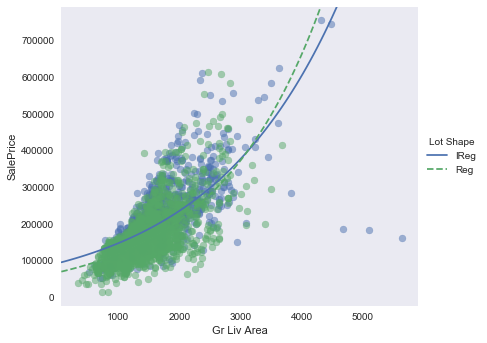

In [95]:
model.plot()

From the plot above, we can see that homes with a regular lot shape start off with a lower sale price but as the living area increases the regular lot homes become more expensive. When we think about homes with regular lots, we can imagine a subburan or city home; lots of home with regular square lots. In crowed cities, a regular lot with an extremely large home may easily climb into the millions of dollars surpassing the price of a multi-acre home. So, the relationship actually makes a lot of sense. Now, we can interpret our living area as having a different effect on the sale price, as the living area increase, when the lot is regular.